<a href="https://colab.research.google.com/github/anscch/ATPAD-LAIDEA-UNAM/blob/main/VIEW_ATPAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***VIEW_ATPAD***

VIEW_ATPAD allow basic data visualization. Output files for pollution and meteorology are charged. Basic data spliting can be also done.

In [1]:
!pip install windrose

#***READING POLLUTION OUTPUT FILES FROM CSV***

Change file name in file direction.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import duckdb
connection = duckdb.connect()
import os
import datetime
import matplotlib . dates as mdates
from windrose import WindroseAxes

pollution= pd.read_csv('/content/drive/MyDrive/ATPAD_COLAB/OUTPUT_FILES/pollution_clean_2025-08-25 13:54.csv')  #CHANGE FILE NAME
pollution['Time']=pd.to_datetime(pollution['Time'])
pollution = pollution.drop(columns=['Unnamed: 0'])
pollution

,Time,region,O3,SO2,NO2,NO,CO,PM10,PM25
0,2016-01-01 00:00:00,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 01:00:00,Aguascalientes,2.76,0.25,14.88,NaN,2.98,120.75,NaN
2,2016-01-01 02:00:00,Aguascalientes,3.31,0.25,15.33,NaN,2.86,124.76,NaN
3,2016-01-01 03:00:00,Aguascalientes,2.24,0.25,15.16,39.00,2.26,101.97,NaN
4,2016-01-01 04:00:00,Aguascalientes,2.47,NaN,14.50,33.44,2.18,85.84,81.12
...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,Aguascalientes,43.81,NaN,2.13,0.20,1.55,34.22,29.95
8780,2016-12-31 20:00:00,Aguascalientes,41.40,NaN,3.13,0.20,1.57,32.28,25.12
8781,2016-12-31 21:00:00,Aguascalientes,44.20,NaN,3.14,0.20,1.57,32.93,23.13
8782,2016-12-31 22:00:00,Aguascalientes,40.76,NaN,5.60,1.29,1.62,28.74,28.52


#***READING METEOROLOGY OUTPUT FILES FROM CVS***

In [3]:
meteo= pd.read_csv('/content/drive/MyDrive/ATPAD_COLAB/OUTPUT_FILES/meteo_clean_2025-08-25 13:58.csv')
meteo['Time']=pd.to_datetime(meteo['Time'])
meteo = meteo.drop(columns=['Unnamed: 0'])
meteo

,Time,region,Temp_Avg,WSpeed_AVG,WSpeed_Max,Rain_Tot,Press_Avg,Rad_Avg,RH_Avg,WDir_AVG
0,2016-01-01 00:00:00,Aguascalientes,15.57,1.612,NaN,0.0,815.0,NaN,64.90,17.1
1,2016-01-01 01:00:00,Aguascalientes,13.95,0.845,NaN,0.0,814.0,NaN,71.67,354.3
2,2016-01-01 02:00:00,Aguascalientes,13.06,1.713,NaN,0.0,814.0,NaN,74.56,14.2
3,2016-01-01 03:00:00,Aguascalientes,12.13,1.781,NaN,0.0,814.0,NaN,76.34,15.5
4,2016-01-01 04:00:00,Aguascalientes,11.24,1.957,NaN,0.0,814.0,NaN,80.22,22.9
...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,Aguascalientes,19.73,2.460,NaN,0.0,815.0,3.7,39.15,279.8
8780,2016-12-31 20:00:00,Aguascalientes,18.37,2.147,NaN,0.0,815.2,NaN,43.65,267.0
8781,2016-12-31 21:00:00,Aguascalientes,17.75,2.023,NaN,0.0,816.0,NaN,45.81,276.8
8782,2016-12-31 22:00:00,Aguascalientes,16.96,1.511,NaN,0.0,816.2,NaN,47.52,277.7


#***SELECT A SPECIFIC TIME PERIOD***

In [4]:
start_date ='2016-02-01 00:00:00'
end_date = '2024-05-31 23:00:00'

rango = (pollution['Time'] > start_date) & (pollution['Time'] <= end_date)
pollution =pollution.loc[rango]

rango = (meteo['Time'] > start_date) & (meteo['Time'] <= end_date)
meteo =meteo.loc[rango]

#***WIND ROSES***

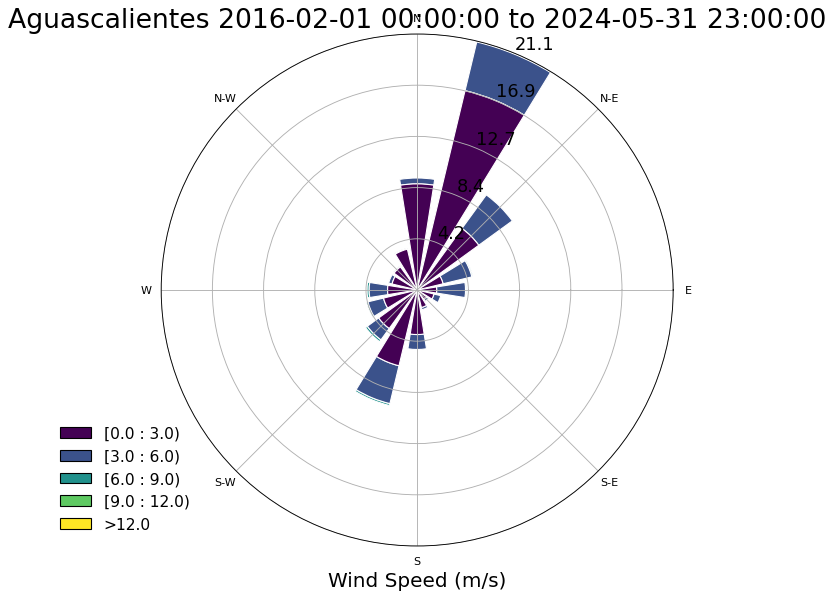

In [5]:
import matplotlib.cm as cm
for region in meteo['region'].unique():
    data = meteo.loc[meteo['region'] == region]
    ax = WindroseAxes.from_ax()
    bins_range=np.arange(0, 15, 3)
    ax.bar(data['WDir_AVG'], data['WSpeed_AVG'], normed=True, nsector= 16, opening=0.8, edgecolor="white", bins=bins_range)
    ax.set_xlabel("Wind Speed (m/s)" , fontsize = '18')
    ax.set_legend()
    plt.legend(loc='lower left', frameon=False, bbox_to_anchor=[-0.225, 0], fontsize=14)
    plt.yticks(size=16)
    plt.title(region + ' ' + start_date + ' to ' + end_date, fontsize =24)

#***HISTOGRAMS FOR METEOROLOGY***

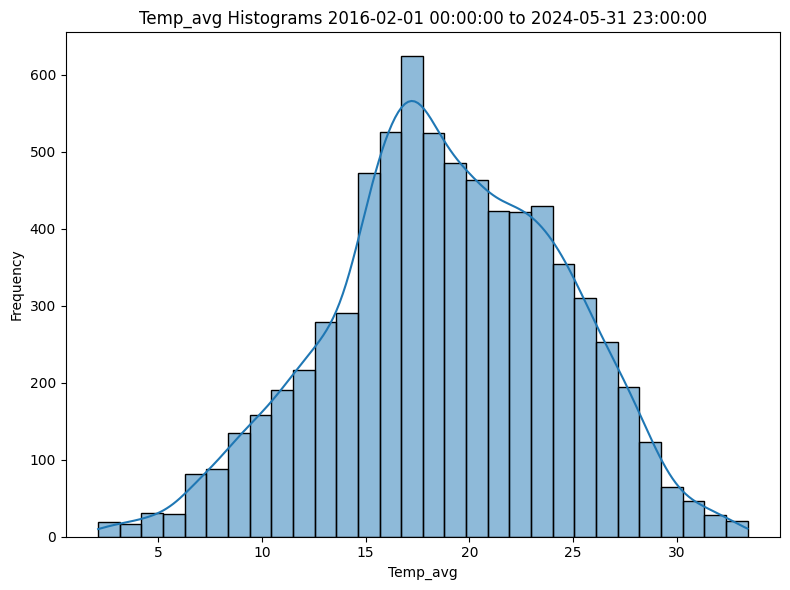

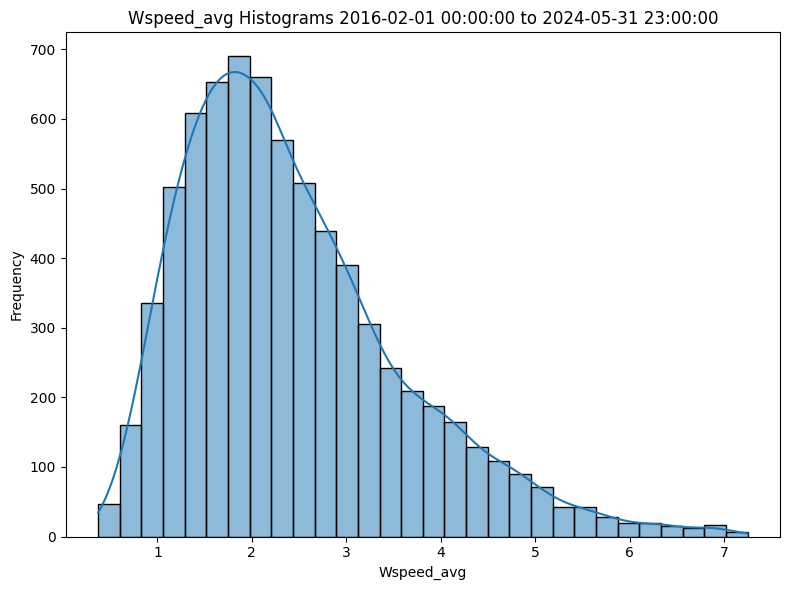

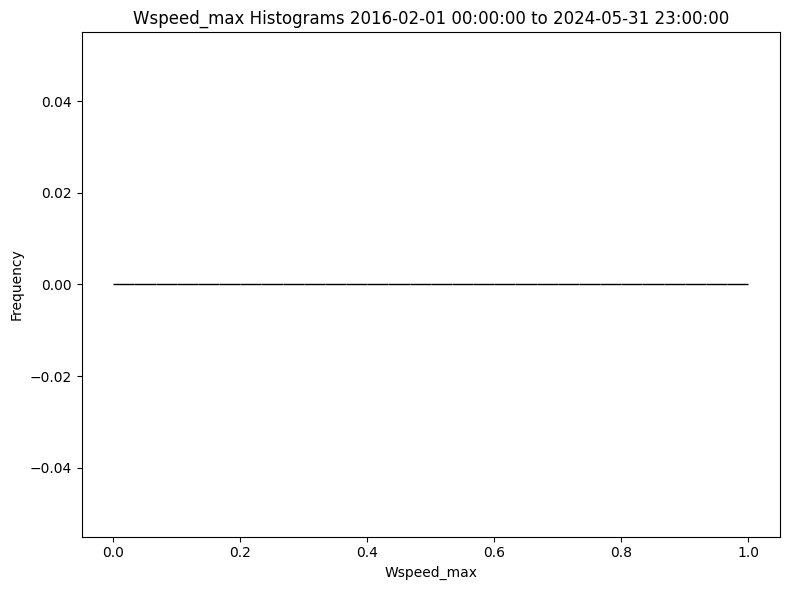

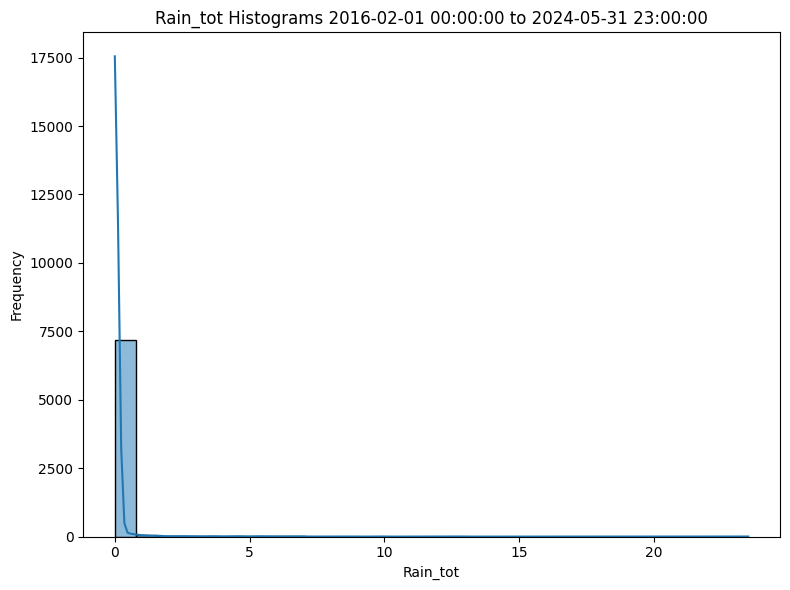

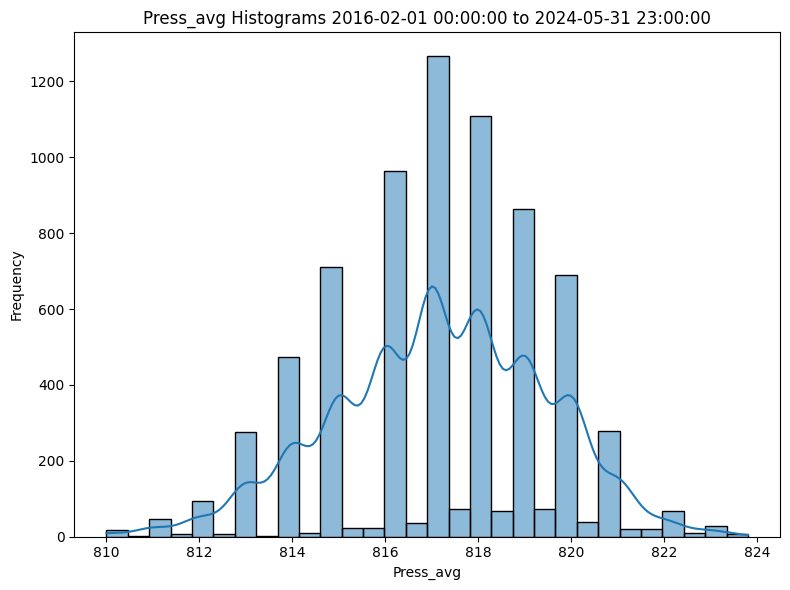

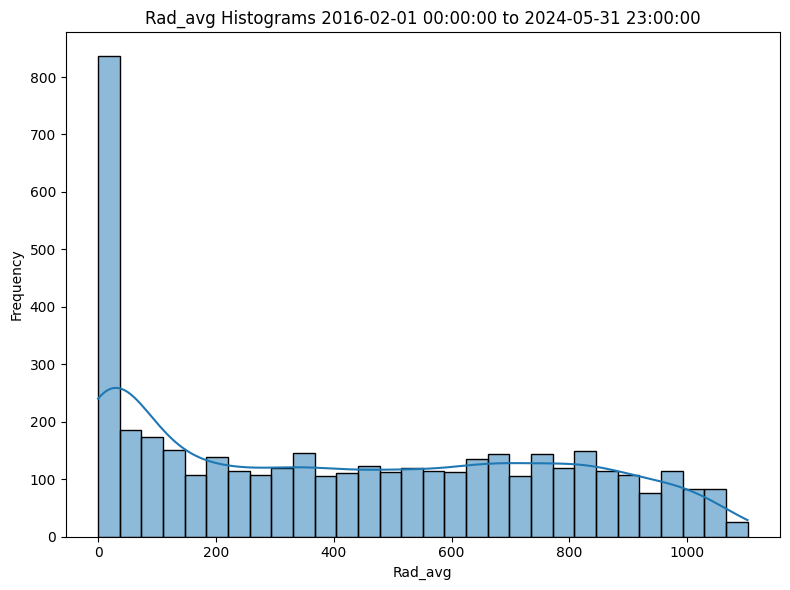

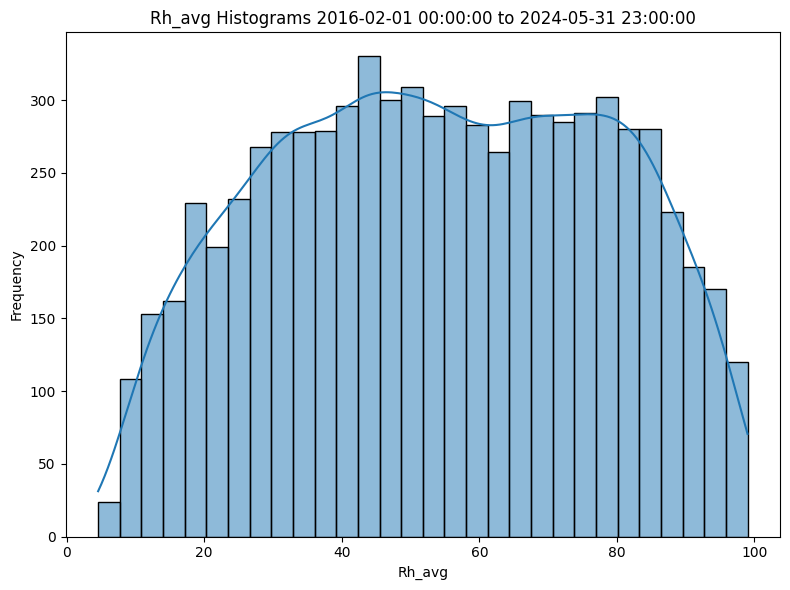

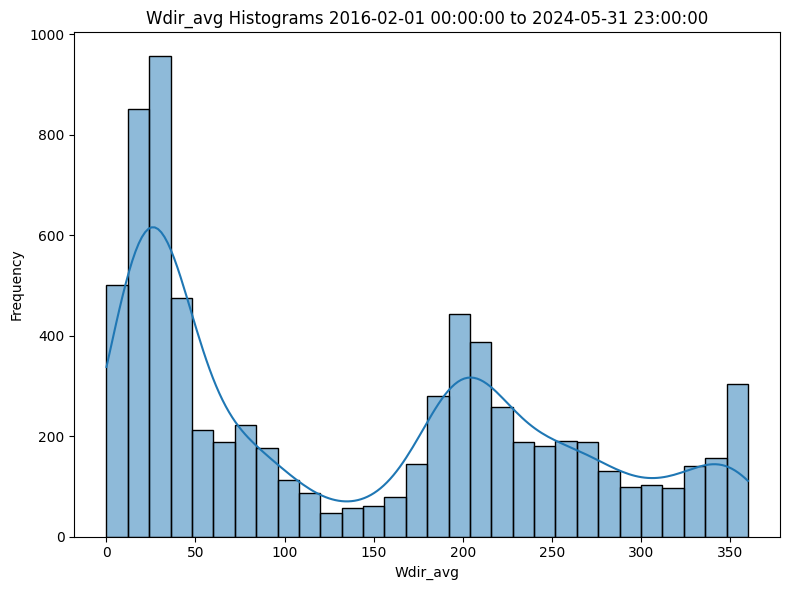

In [15]:
no_column = ['Time', 'region']
parameters = [col for col in meteo.columns if col not in no_column]

for parameter in parameters:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=meteo, x=parameter, kde=True, bins=30)
    plt.title(f'{parameter.capitalize()} Histograms ' + start_date + ' to ' + end_date)
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#***VIOLIN PLOTS FOR METEOROLOGY***

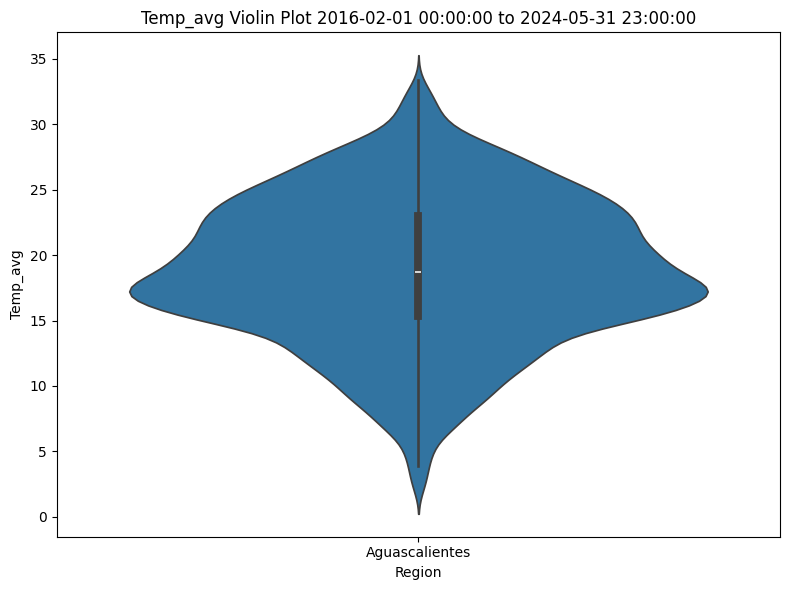

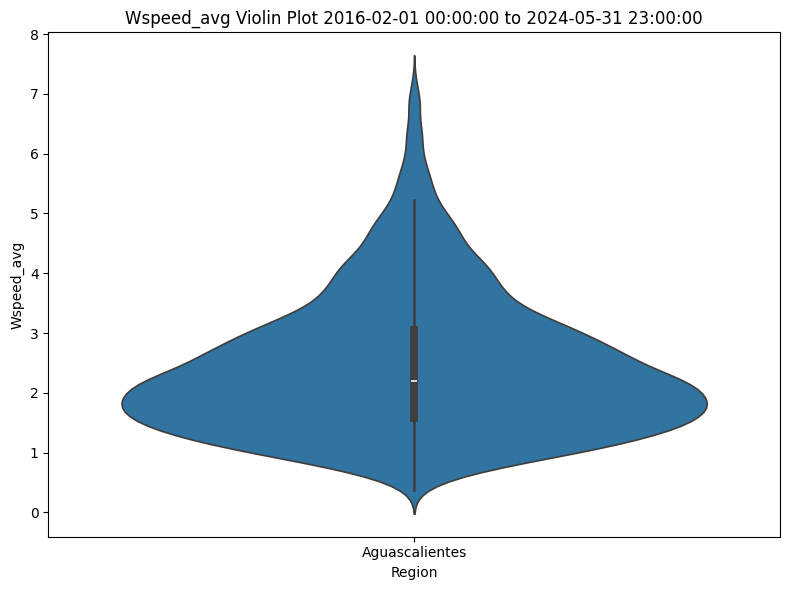

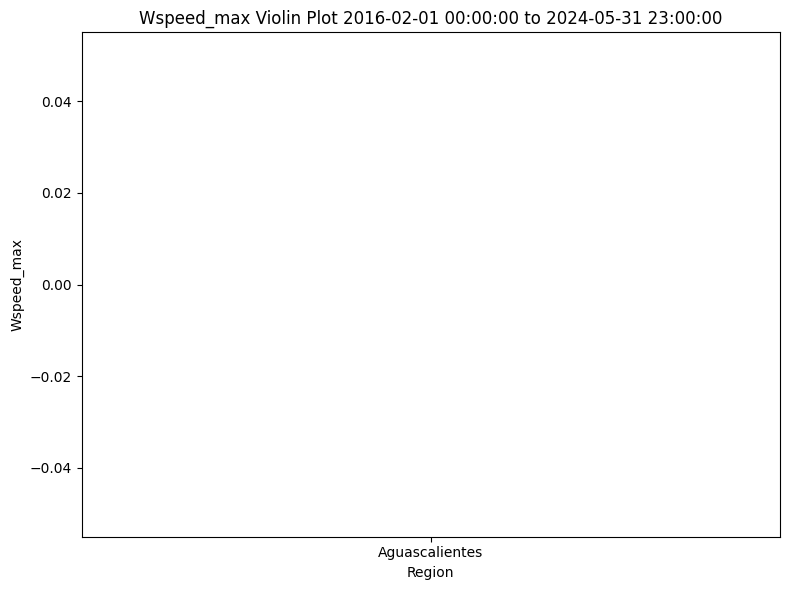

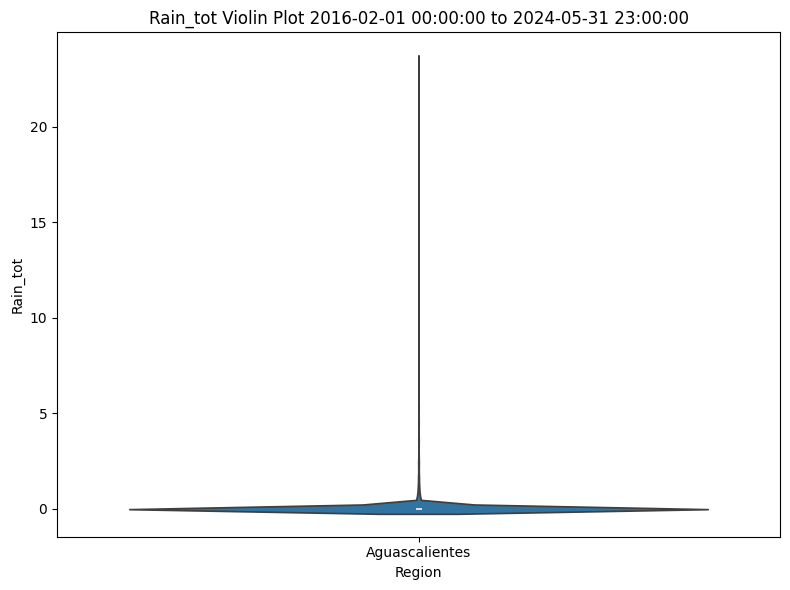

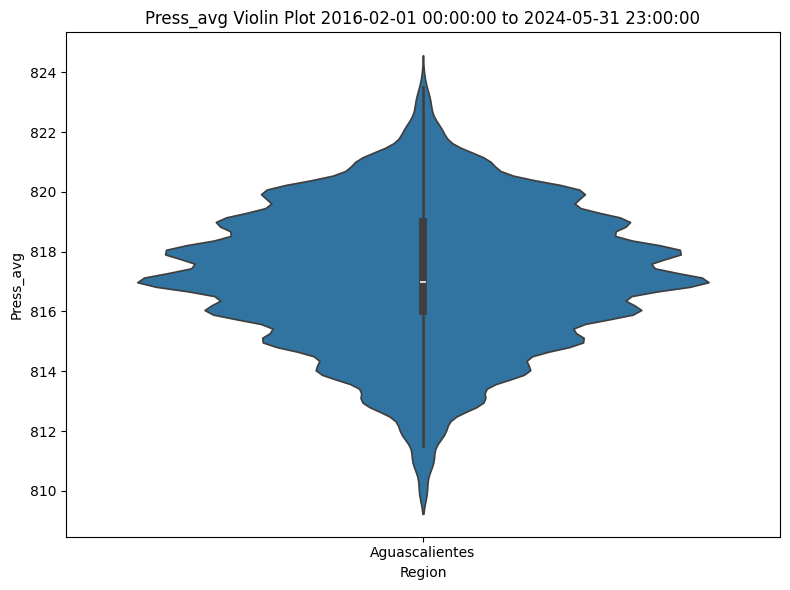

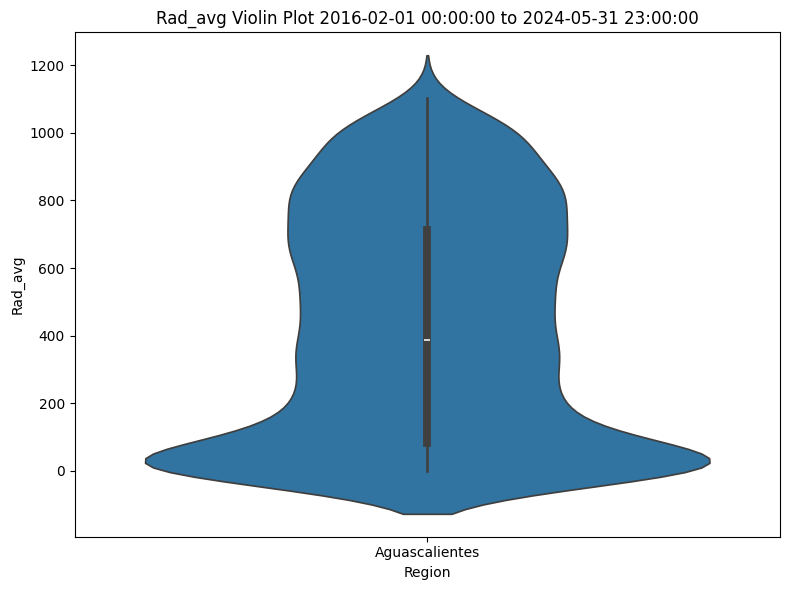

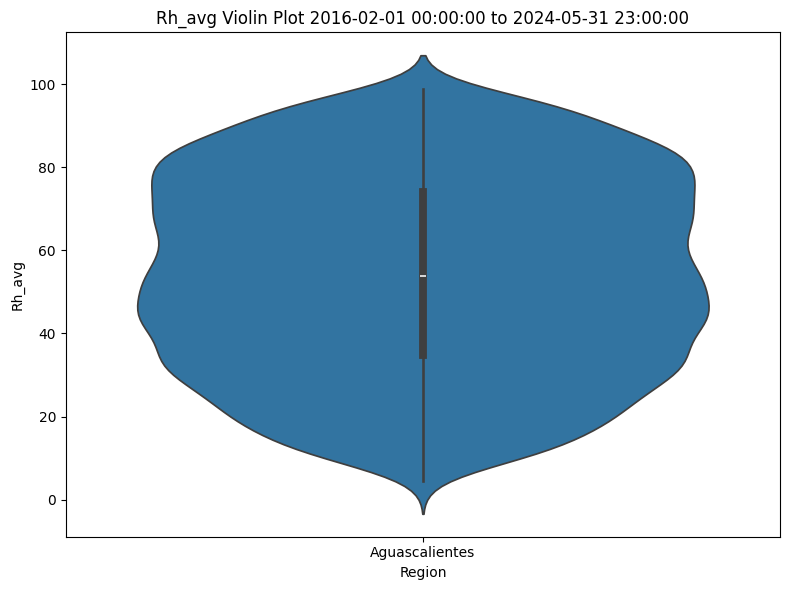

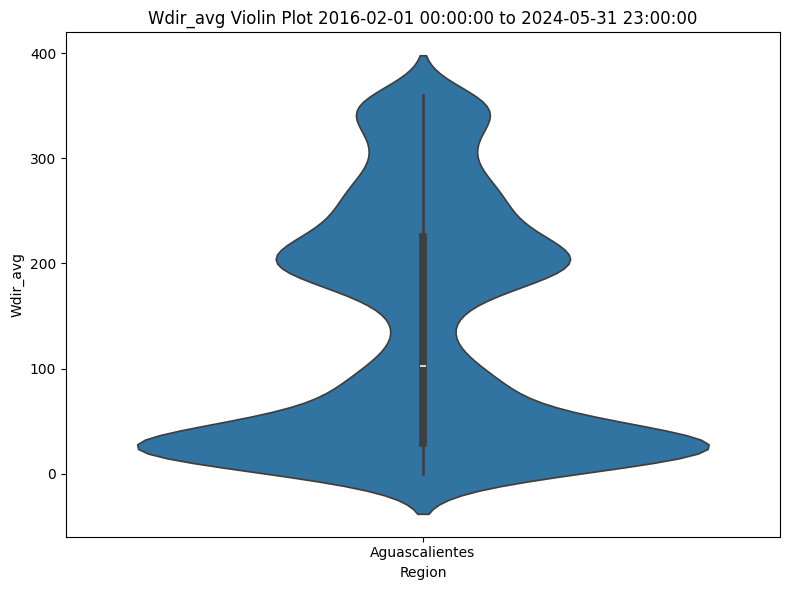

In [14]:
no_column = ['Time', 'region']
parameters = [col for col in meteo.columns if col not in no_column]

for parameter in parameters:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=meteo, x= 'region', y=parameter, inner='box')
    plt.title(f'{parameter.capitalize()} Violin Plot ' + start_date + ' to ' + end_date)
    plt.xlabel('Region')
    plt.ylabel(parameter.capitalize())
    plt.tight_layout()
    plt.show()

#***TIME SERIES FOR METEOROLOGY***

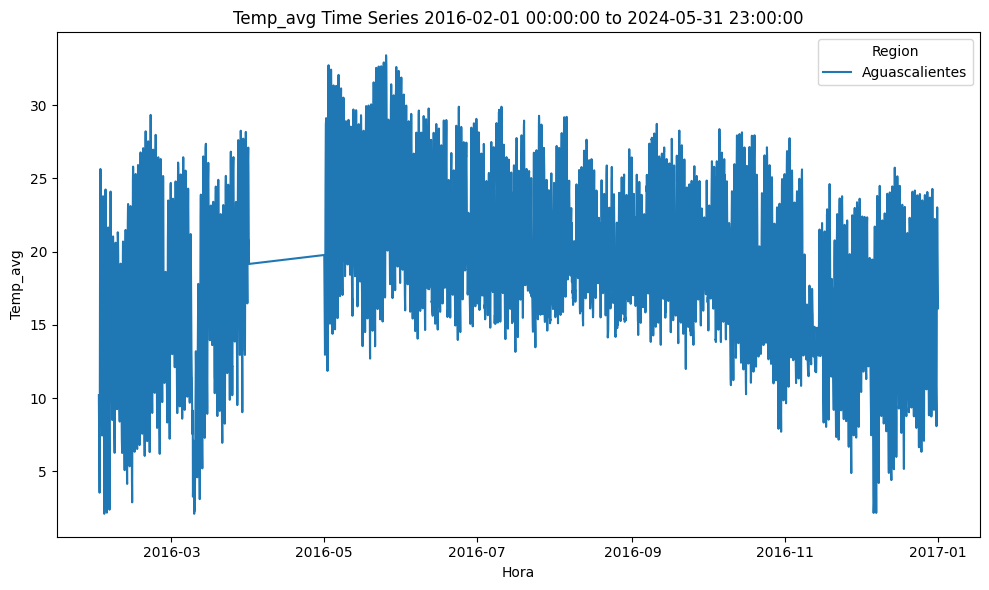

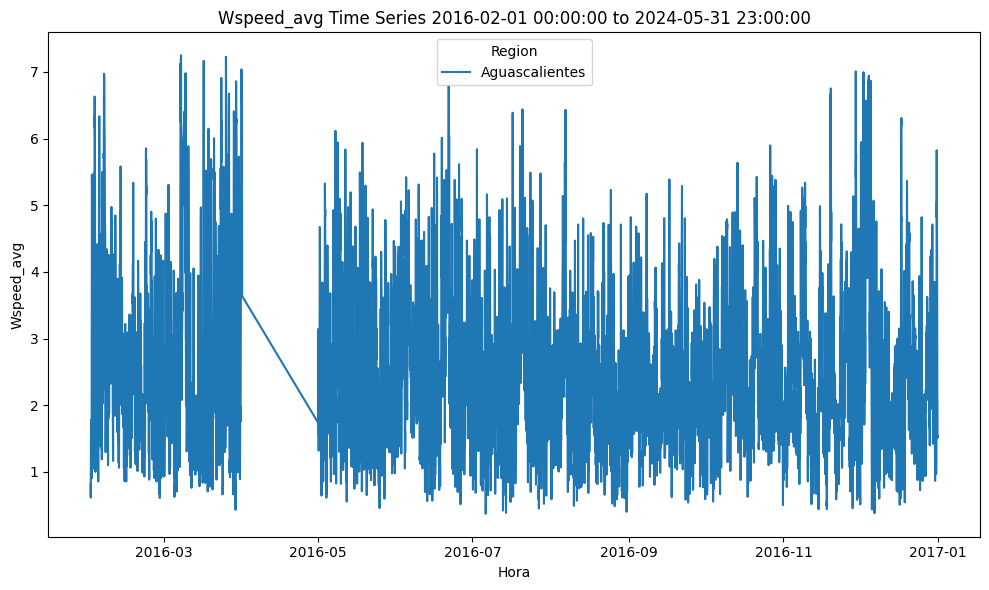

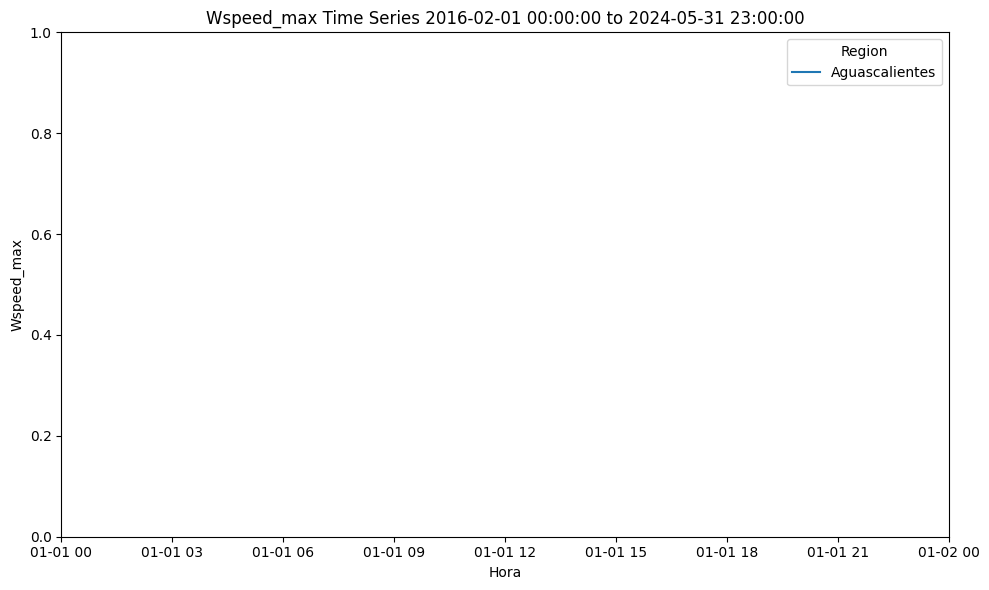

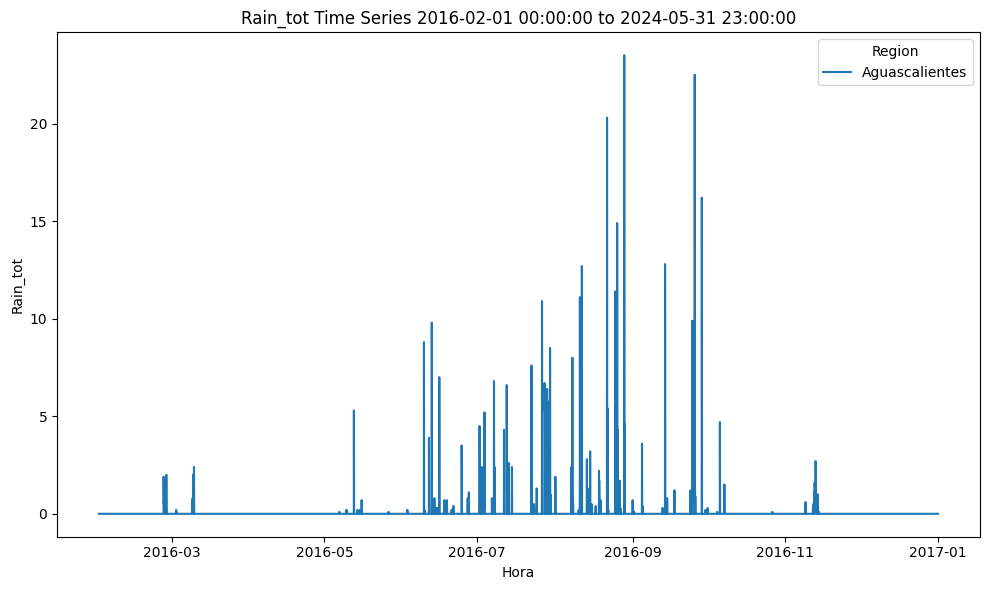

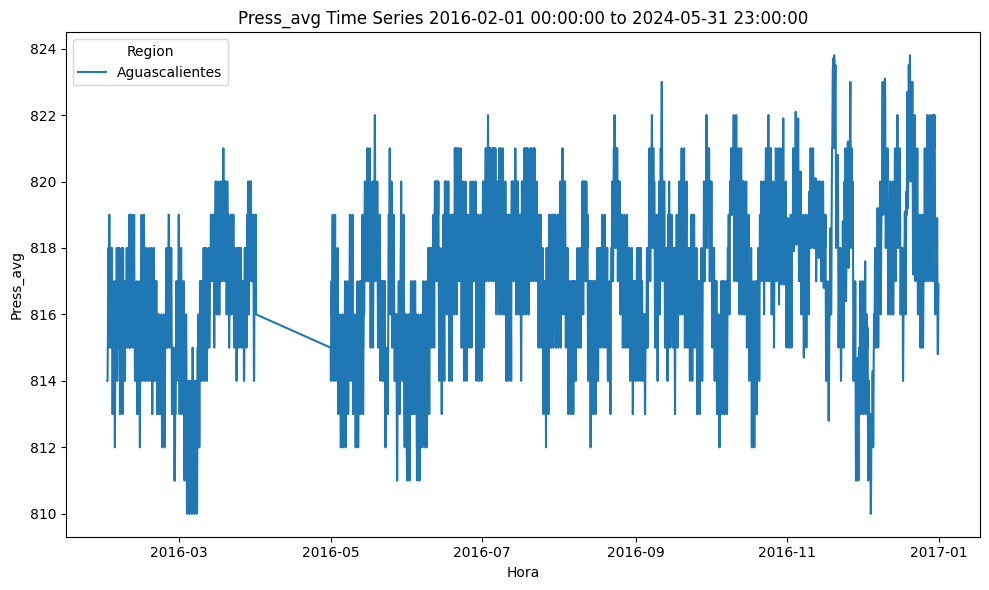

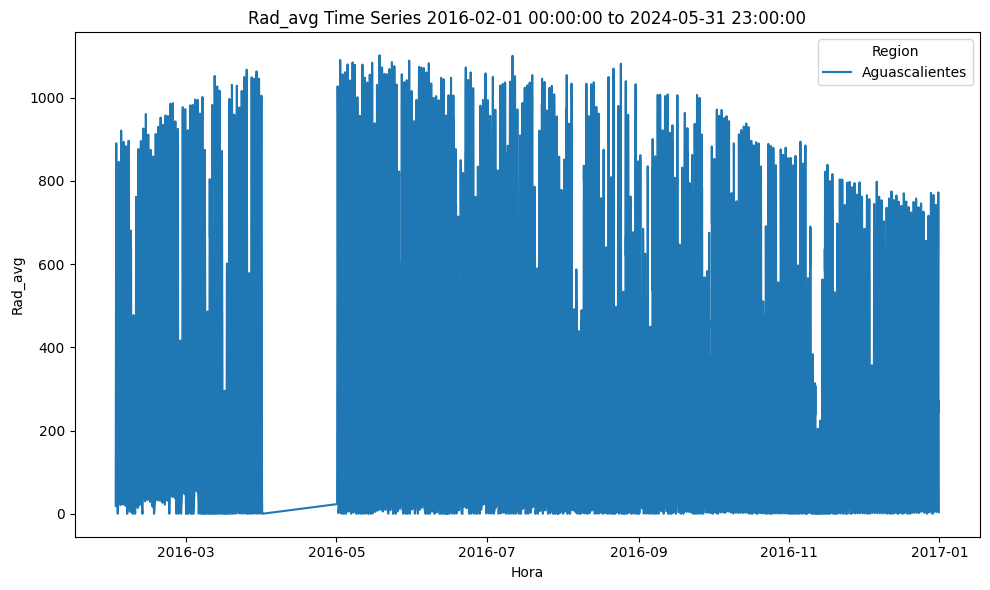

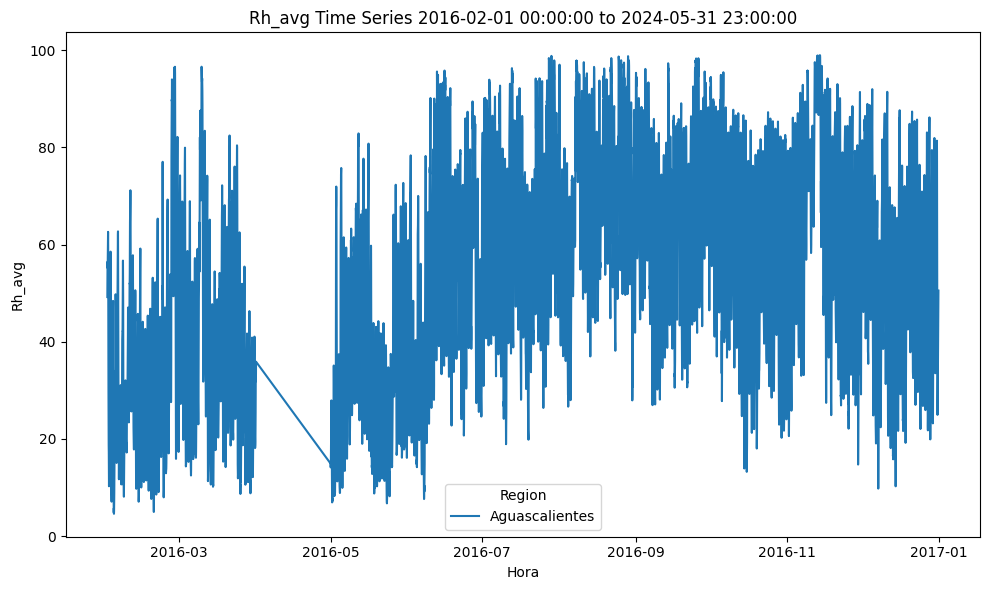

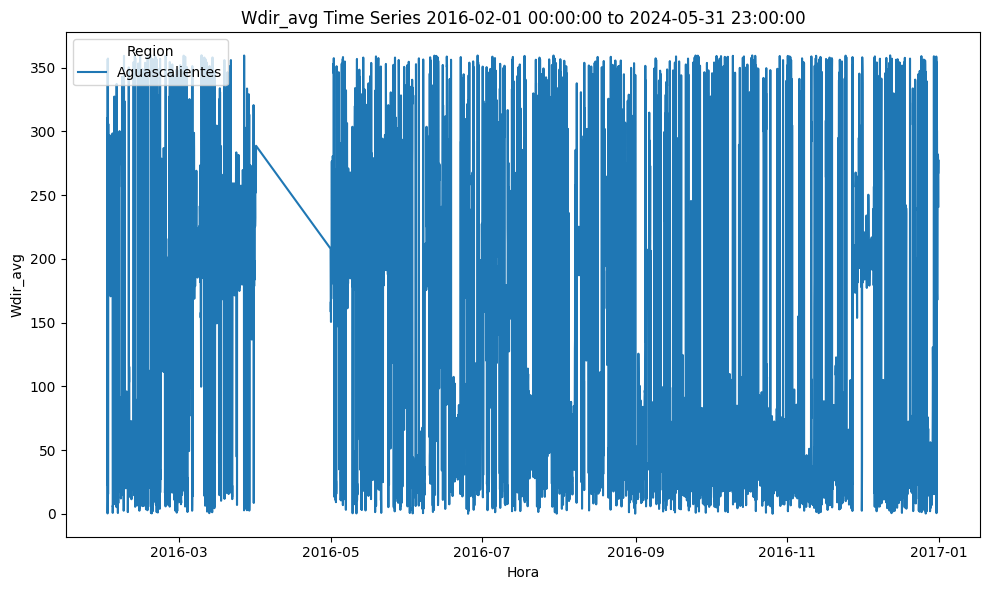

In [16]:
no_column = ['Time', 'region']
parameters = [col for col in meteo.columns if col not in no_column]

for parameter in parameters:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=meteo, x='Time', y=parameter, hue='region', palette='tab10')
    plt.title(f'{parameter.capitalize()} Time Series ' + start_date + ' to ' + end_date)
    plt.xlabel('Hora')
    plt.ylabel(parameter.capitalize())
    plt.legend(title='Region')
    plt.tight_layout()
    plt.show()

#***HISTOGRAMS FOR POLLUTION***

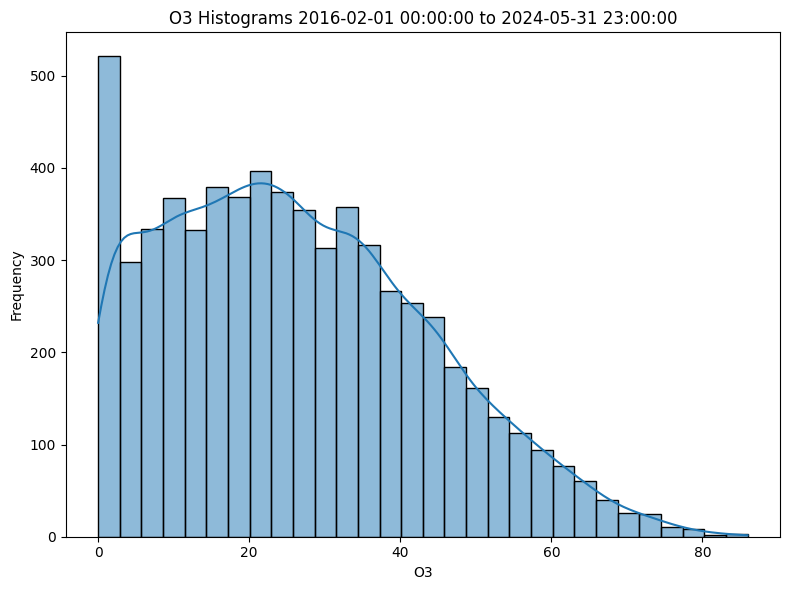

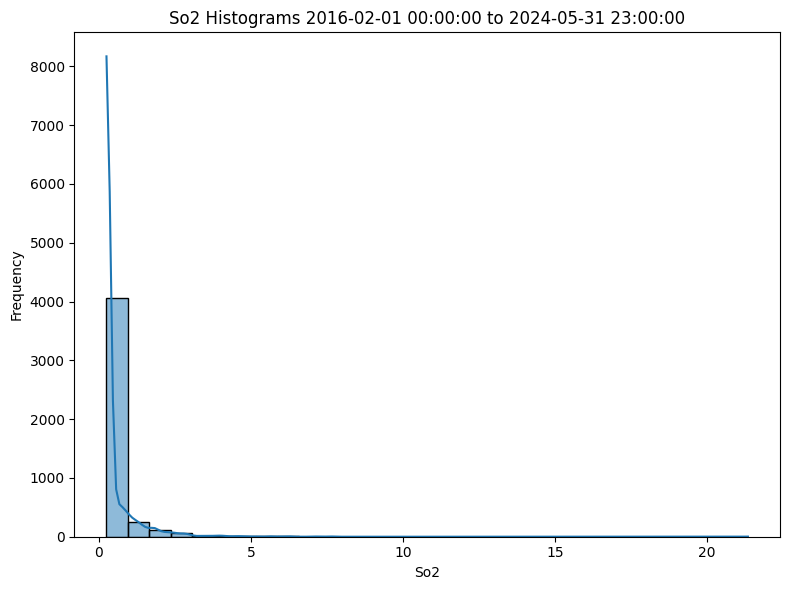

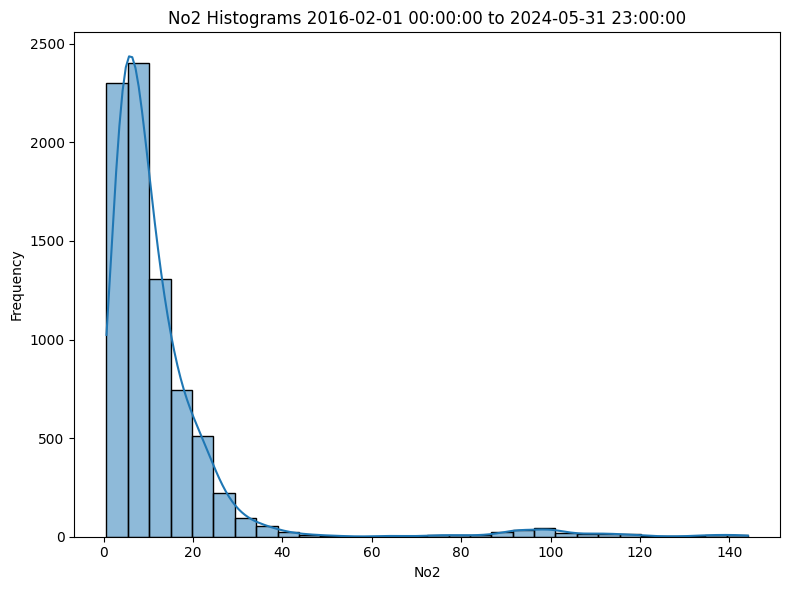

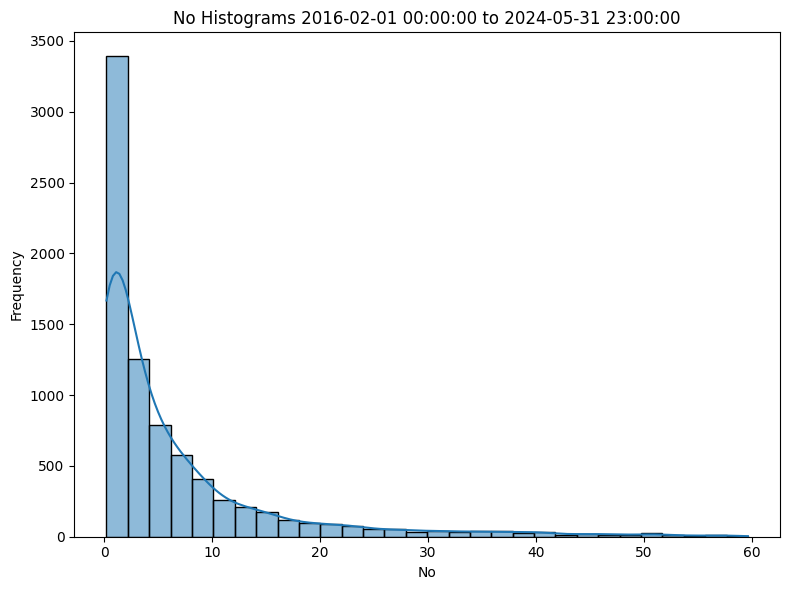

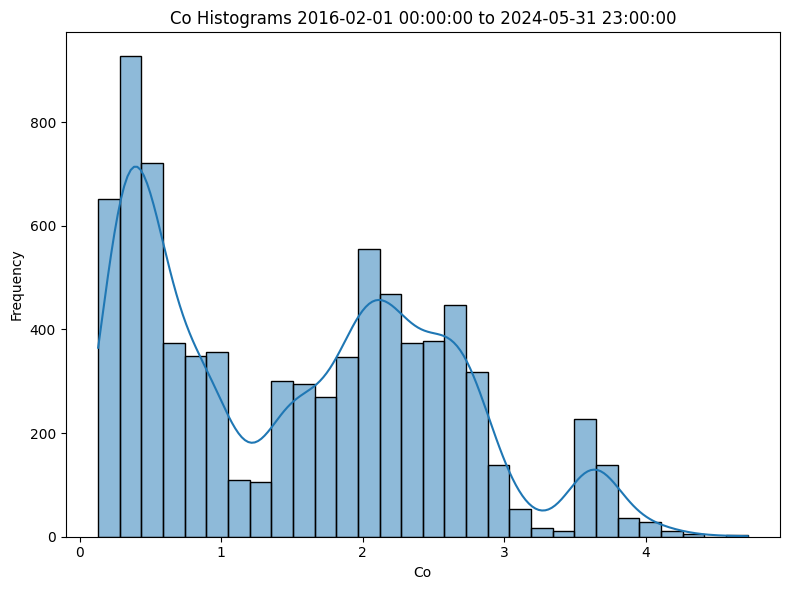

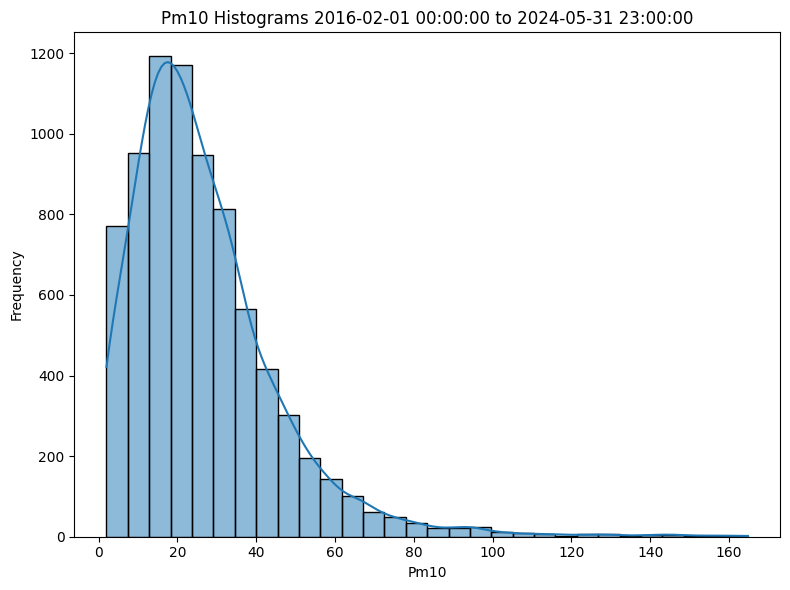

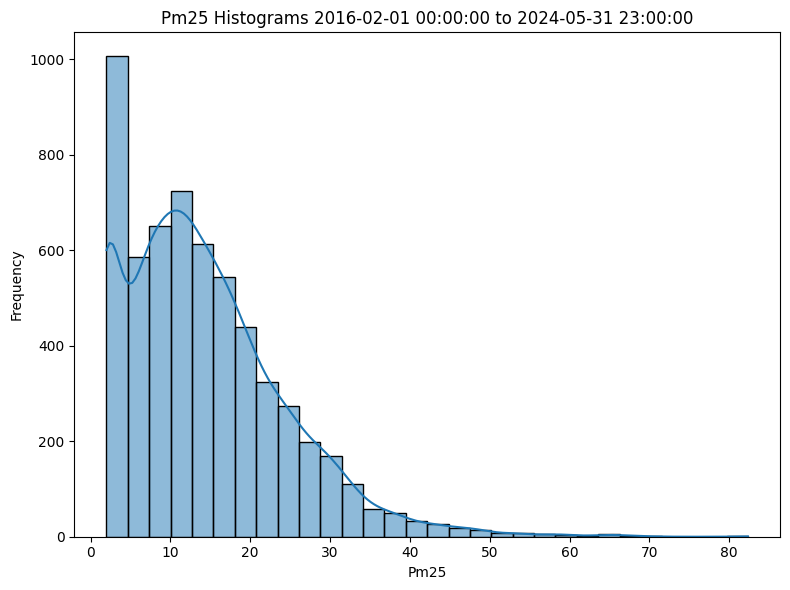

In [17]:
no_column = ['Time', 'region']
parameters = [col for col in pollution.columns if col not in no_column]

for parameter in parameters:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=pollution, x=parameter, kde=True, bins=30)
    plt.title(f'{parameter.capitalize()} Histograms ' + start_date + ' to ' + end_date)
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#***VIOLIN PLOTS FOR POLLUTION***

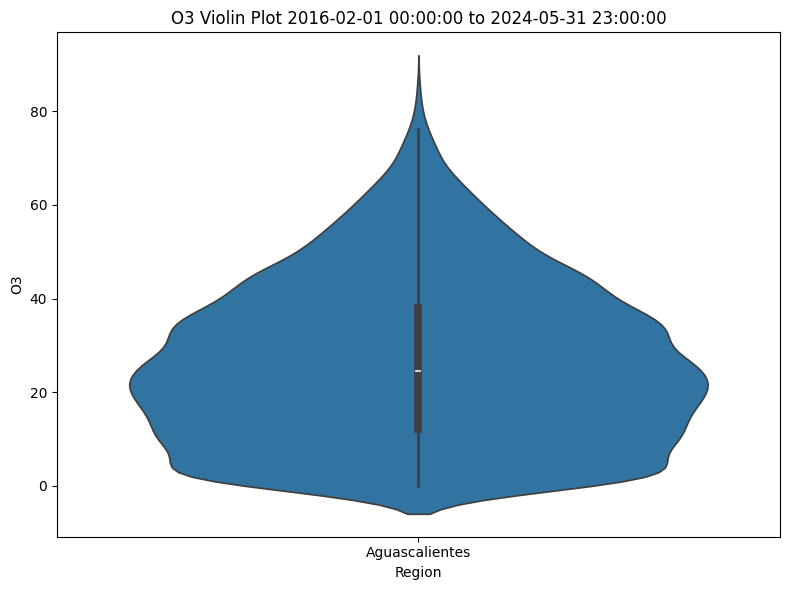

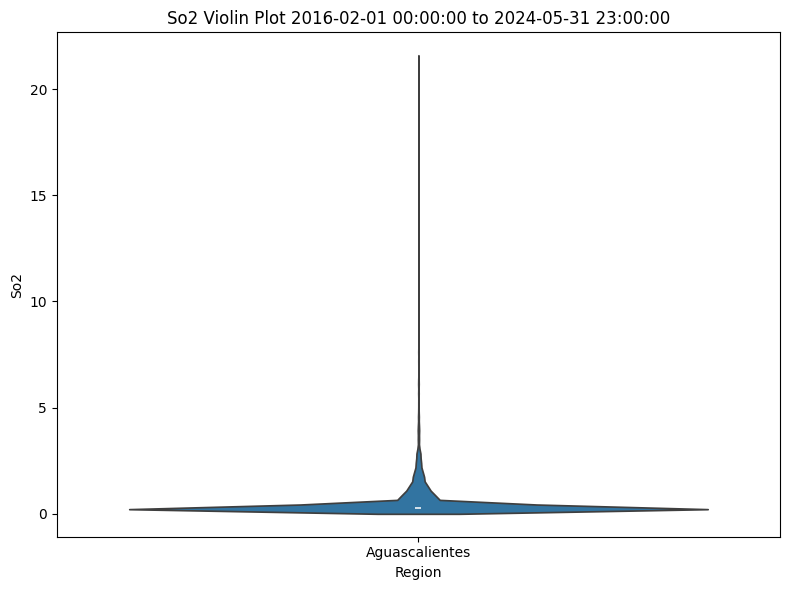

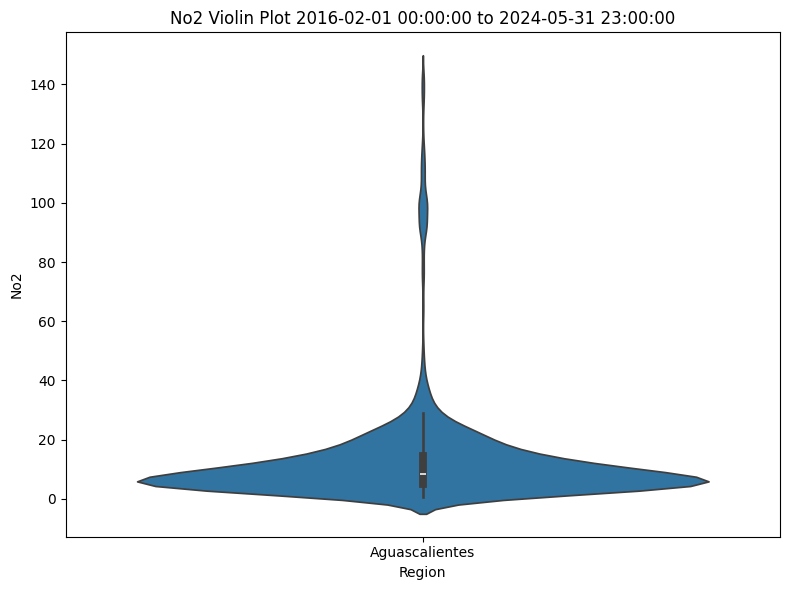

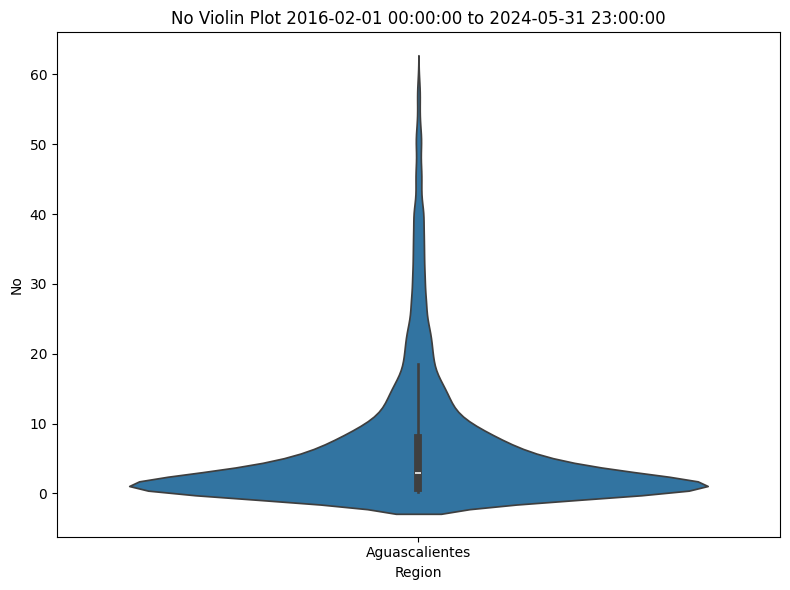

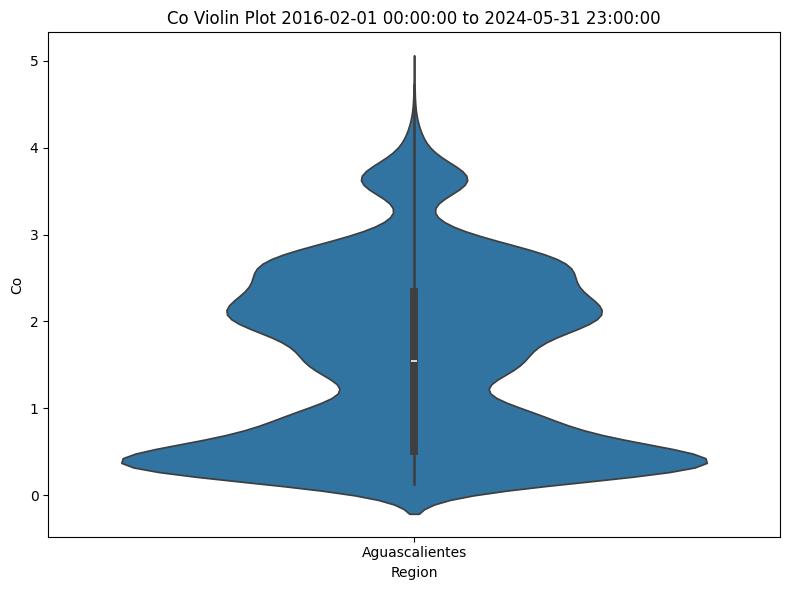

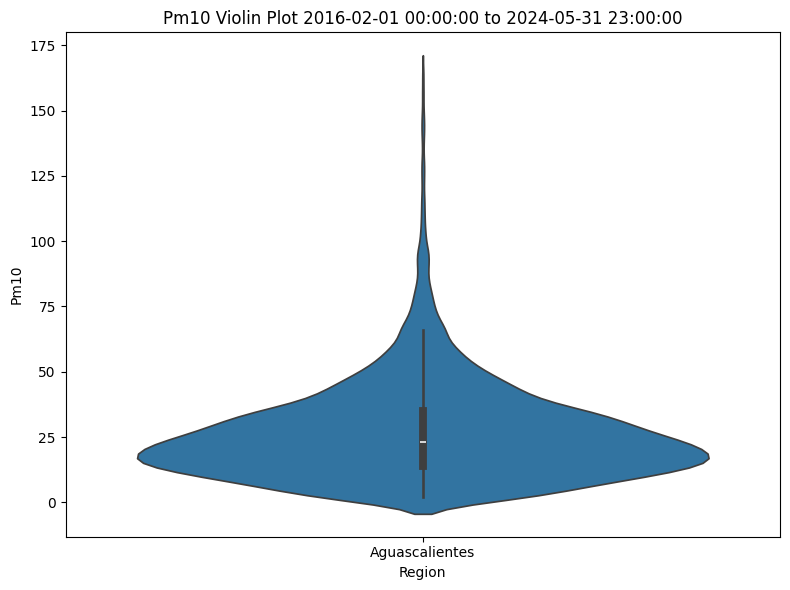

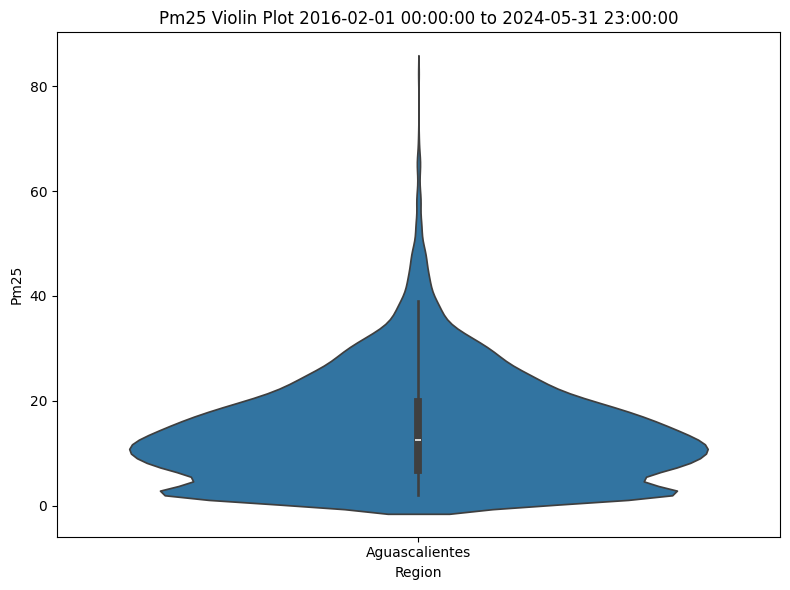

In [18]:
no_column = ['Time', 'region']
parameters = [col for col in pollution.columns if col not in no_column]

for parameter in parameters:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=pollution, x='region', y=parameter, inner='box')
    plt.title(f'{parameter.capitalize()} Violin Plot ' + start_date + ' to ' + end_date)
    plt.xlabel('Region')
    plt.ylabel(parameter.capitalize())
    plt.tight_layout()
    plt.show()

#***TIME SERIES FOR POLLUTION***

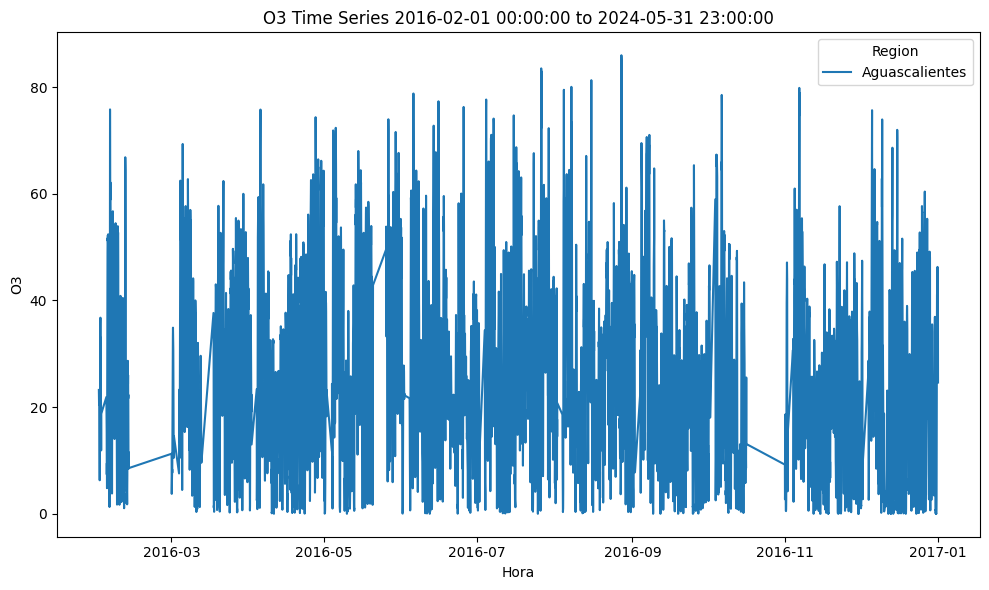

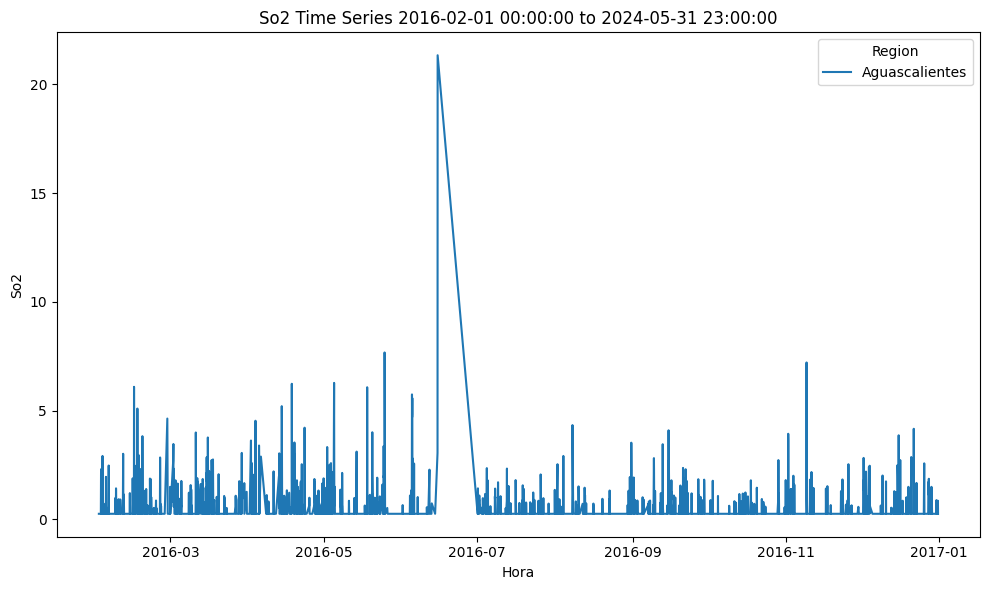

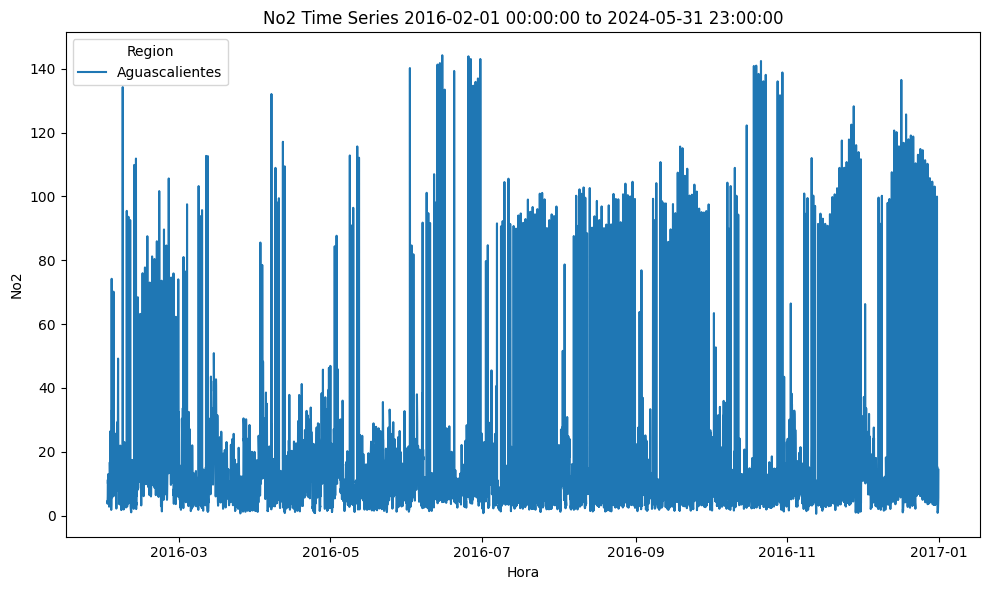

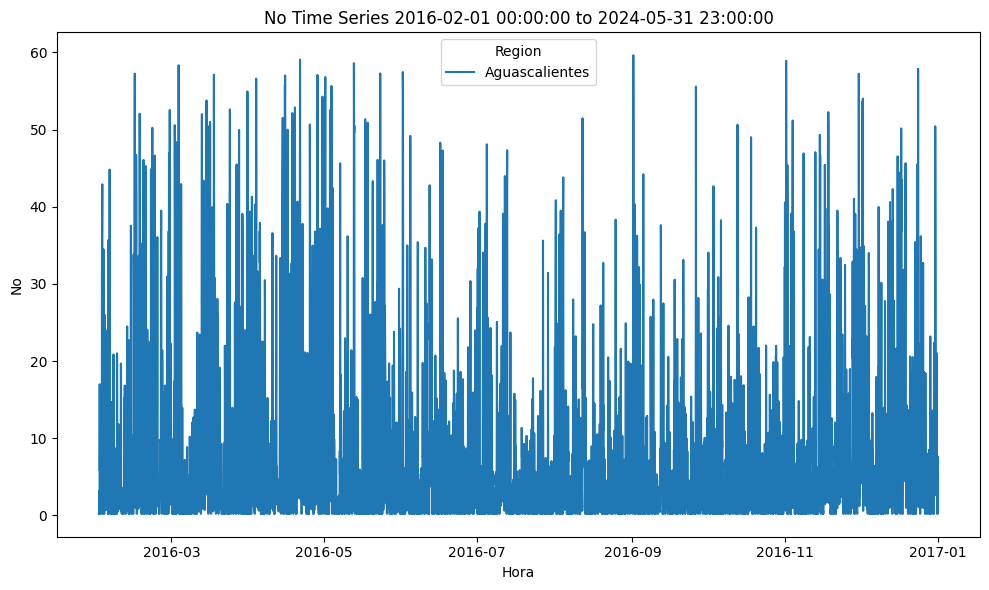

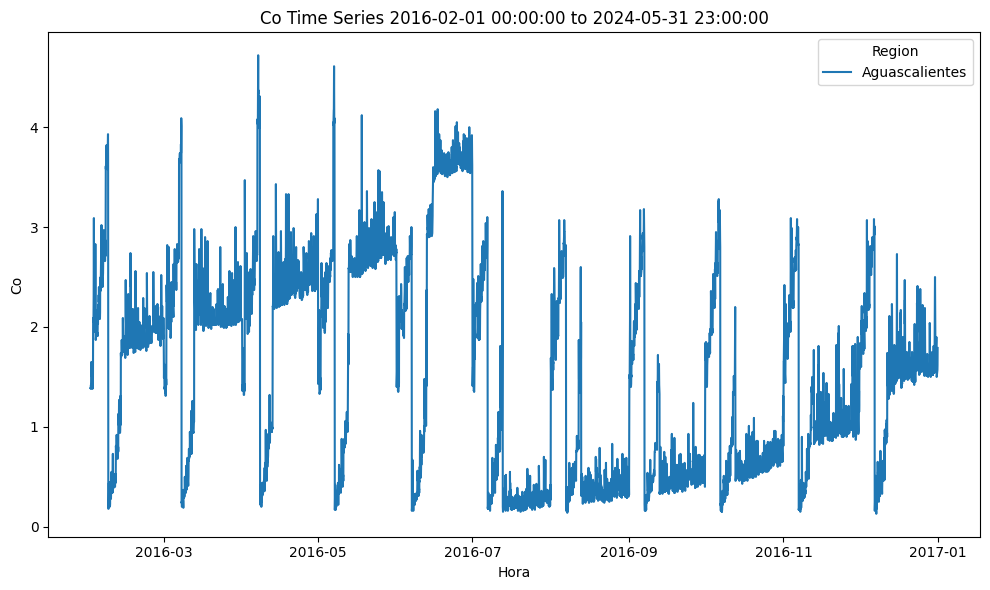

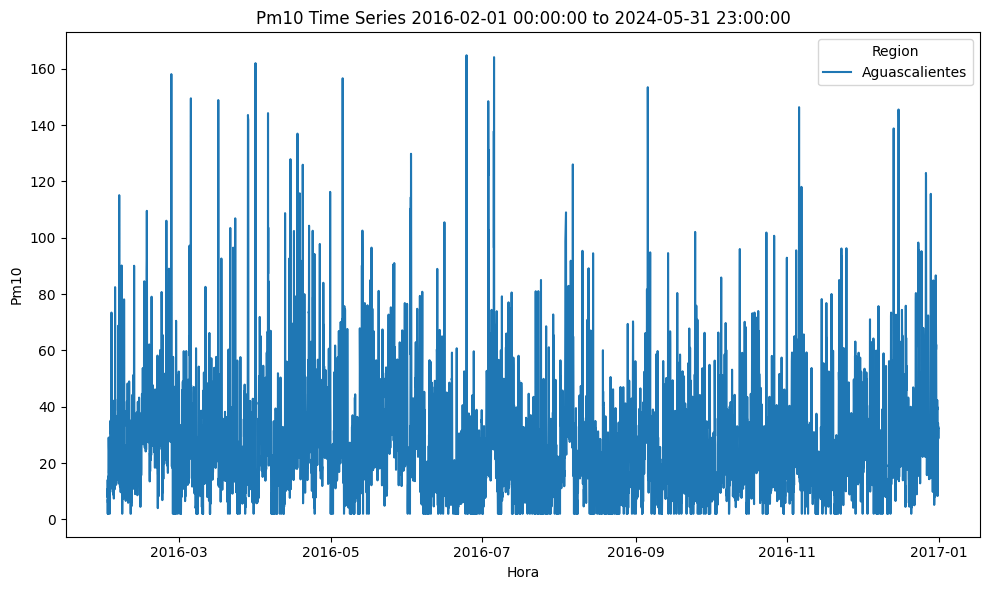

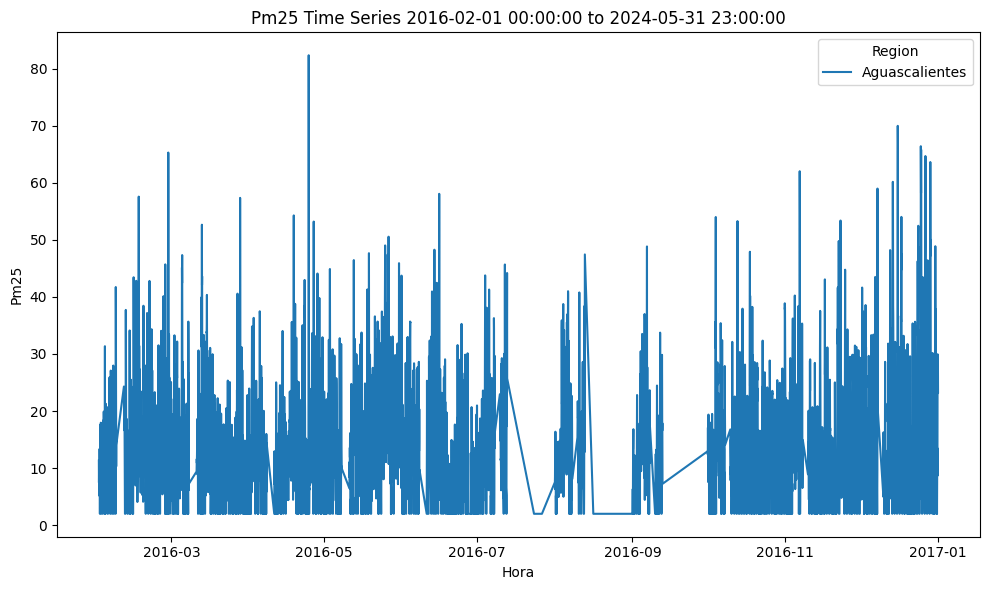

In [19]:
no_column = ['Time', 'region']
parameters = [col for col in pollution.columns if col not in no_column]

for parameter in parameters:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pollution, x='Time', y=parameter, hue='region', palette='tab10')
    plt.title(f'{parameter.capitalize()} Time Series ' + start_date + ' to ' + end_date)
    plt.xlabel('Hora')
    plt.ylabel(parameter.capitalize())
    plt.legend(title='Region')
    plt.tight_layout()
    plt.show()

#***POLLUTION ROSES***
Pollutant and region need to be defined.
Pollutant and wind direction data lenght need to be the same

Text(0.5, 1.0, 'Aguascalientes PM25 Pollution Rose 2016-02-01 00:00:00 to 2024-05-31 23:00:00')

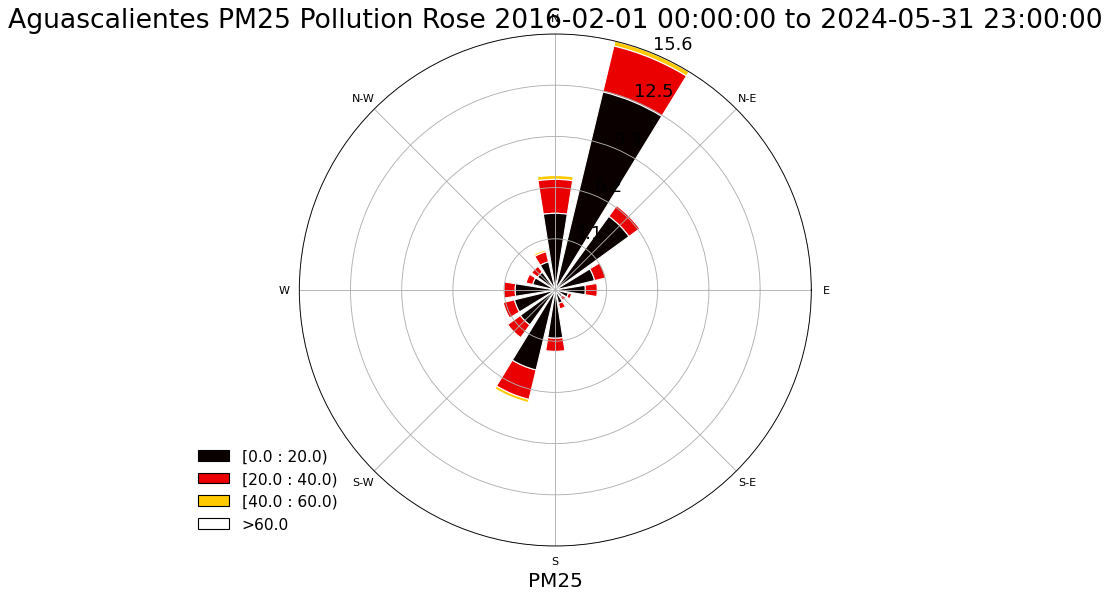

In [21]:
import matplotlib.cm as cm

pollutant ='PM25'
region = 'Aguascalientes'


pollution_region = pollution.loc[pollution['region']==region]
meteo_region = meteo.loc[meteo['region']==region]
ax = WindroseAxes.from_ax()
bins_range=np.arange(0, 80, 20)
ax.bar(meteo_region['WDir_AVG'], pollution_region[pollutant], normed=True, nsector= 16, opening=0.8, edgecolor="white", bins=bins_range, cmap=cm.hot)
ax.set_xlabel(f'{pollutant}' , fontsize = '18')
ax.set_legend()
plt.legend(loc='lower left', frameon=False, bbox_to_anchor=[-0.225, 0], fontsize=14)
plt.yticks(size=16)
plt.title(f'{region} {pollutant} Pollution Rose ' + start_date + ' to ' + end_date, fontsize =24)